In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.stats import zscore

In [41]:
df = pd.read_excel(r'2019 Winter Data Science Intern Challenge Data Set.xlsx')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


In [42]:
# Check for nulls
df.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [43]:
# Get the data types of each column.
df.dtypes

order_id                   int64
shop_id                    int64
user_id                    int64
order_amount               int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
dtype: object

In [44]:
# Shopify's average calculation
avg_per_order = df["order_amount"].mean()
# Other relevant measures
tot_items = df["total_items"].sum()
num_orders = df["order_id"].count()
tot_order_amount = df["order_amount"].sum()

avg_per_item = tot_order_amount/tot_items

# Print for visibility
print("Total orders: " + str(num_orders))
print("Total amount: " + str(tot_order_amount))
print("Total items ordered: " + str(tot_items))
print("Average per order: " + str(avg_per_order))
print("Average per item: " + str(avg_per_item))

Total orders: 5000
Total amount: 15725640
Total items ordered: 43936
Average per order: 3145.128
Average per item: 357.92152221412965


<function matplotlib.pyplot.show(close=None, block=None)>

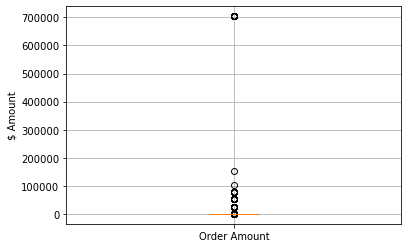

In [45]:
x_labels=["Order Amount"]
fig, ax = plt.subplots()
ax.boxplot(df["order_amount"], labels=x_labels)

ax.set_ylabel('$ Amount')
#ax.set_yticks(np.arange())
ax.grid()
plt.show

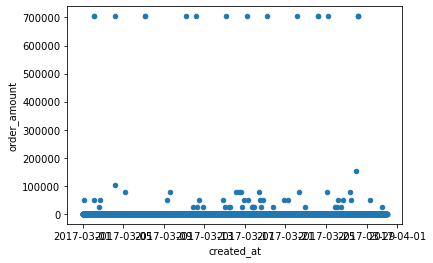

In [46]:
# visualize the relative amounts being spent over time
ax1 = df.plot.scatter(x='created_at',
                      y='order_amount')

In [47]:
oa_df = df[['order_amount']]
oa_df

,order_amount
0,224
1,90
2,144
3,156
4,156
...,...
4995,330
4996,234
4997,351
4998,354


In [48]:
oa_df = df[['order_amount']]

z_scores = stats.zscore(oa_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

<function matplotlib.pyplot.show(close=None, block=None)>

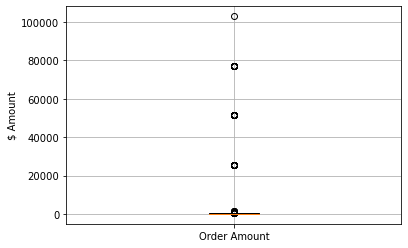

In [59]:
x_labels=["Order Amount"]
fig, ax = plt.subplots()
ax.boxplot(new_df["order_amount"], labels=x_labels)

ax.set_ylabel('$ Amount')
#ax.set_yticks(np.arange())
ax.grid()
plt.show

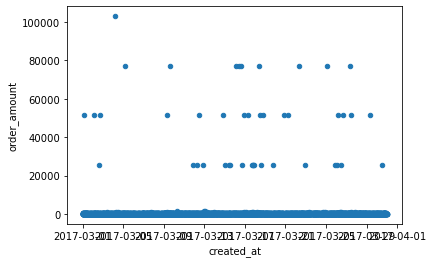

In [49]:
# visualize the relative amounts being spent over time
ax2 = new_df.plot.scatter(x='created_at',
                      y='order_amount')

In [60]:
total_per_user_id = new_df.groupby(["user_id"]).sum()["order_amount"]
total_per_user_id.sort_values(ascending=False)

user_id
834    108342
787     85707
969     84269
818     82485
775     81114
        ...  
750      2359
717      2337
719      2314
939      2196
902      2108
Name: order_amount, Length: 300, dtype: int64

In [61]:
# Calculate the mean, median, and mode for the and suburban driver count Series using NumPy and SciPy statistics module.
mean_per_user_id = np.mean(new_df["order_amount"])
print(f"The mean of order amounts {mean_per_user_id:.2f}")

median_per_user_id = np.median(new_df["order_amount"])
print(f"The median of order amounts {median_per_user_id}")

std_dev_per_user_id = np.std(new_df["order_amount"])
print(f"The standard deviation of order amounts {std_dev_per_user_id}")

The mean of order amounts 723.26
The median of order amounts 284.0
The standard deviation of order amounts 4848.013862109249


In [52]:
df.sort_values(by=['order_amount'], inplace=True, ascending=False)
df.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 04:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 04:00:00


In [53]:
# Lets see what's going on with user_id 607
user_607_df = df[df.user_id == 607]
chron_607_df = user_607_df.sort_values(by=['created_at'])
chron_607_df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00


In [56]:
# Shopify's average calculation
avg_per_order = not_user_607_df["order_amount"].mean()
# Other relevant measures
tot_items = not_user_607_df["total_items"].sum()
num_orders = not_user_607_df["order_id"].count()
tot_order_amount = not_user_607_df["order_amount"].sum()

avg_per_item = tot_order_amount/tot_items

# Print for visibility
print("Total orders: " + str(num_orders))
print("Total amount: " + str(tot_order_amount))
print("Total items ordered: " + str(tot_items))
print("Average per order: " + str(avg_per_order))
print("Average per item: " + str(avg_per_item))

Total orders: 4983
Total amount: 3757640
Total items ordered: 9936
Average per order: 754.0919125025085
Average per item: 378.1843800322061


In [57]:
# I would actually look deeper into 607 to discover the nature of this user and their impact on our business.
# make separate treatment of these individuals a regular part of our pipeline
# Want to know this user who has spent over $2million in a day.
# in some days this individual spends over a million dollars

big_day = user_607_df.groupby(["created_at"]).sum()["order_amount"]
big_day.sort_values(ascending=False)

created_at
2017-03-28 04:00:00    2112000
2017-03-24 04:00:00    1408000
2017-03-07 04:00:00    1408000
2017-03-02 04:00:00    1408000
2017-03-25 04:00:00     704000
2017-03-22 04:00:00     704000
2017-03-19 04:00:00     704000
2017-03-17 04:00:00     704000
2017-03-15 04:00:00     704000
2017-03-12 04:00:00     704000
2017-03-11 04:00:00     704000
2017-03-04 04:00:00     704000
Name: order_amount, dtype: int64